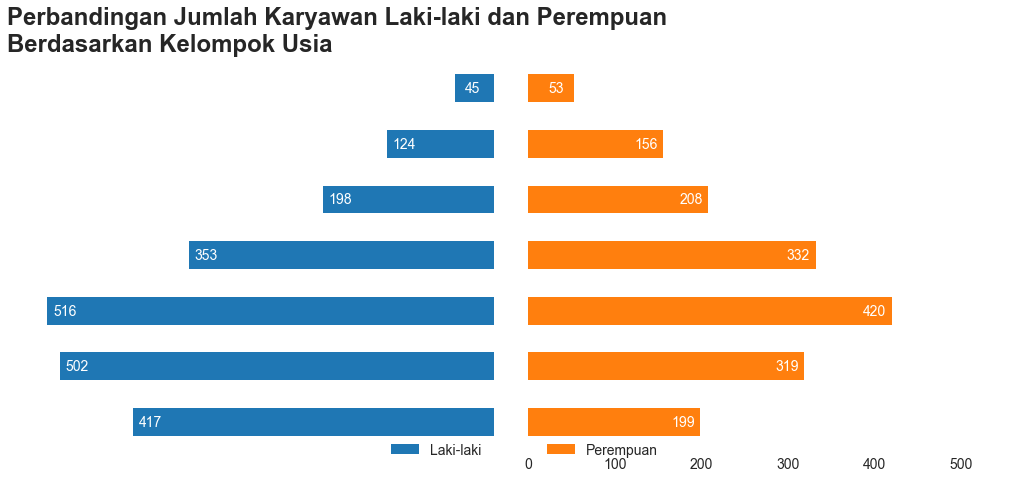

In [12]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("seaborn")

tabel = (pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/usia_karyawan.csv")
.sort_values("Kelompok Usia", ascending=False)
.set_index("Kelompok Usia")
)
tabel["Laki-laki"] = -tabel["Laki-laki"]

fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\nBerdasarkan Kelompok Usia",
x=0., y=1.1, fontsize=24, fontweight='bold', ha="left")
tabel["Laki-laki"].plot(kind="barh", ax=axes[0], color="tab:blue", xlim=[-550, 0])
tabel["Perempuan"].plot(kind="barh", ax=axes[1], color="tab:orange", fontsize=14, xlim=[0, 550])
axes[0].set_ylabel("")
axes[0].set_xticklabels([""])
axes[0].set_yticklabels([""])
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].set_xticklabels([""])
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
axes[1].set_frame_on(False)
for i, m, w in zip(range(tabel.shape[0]), list(tabel['Laki-laki']),  list(tabel['Perempuan'])):
    axes[0].annotate(str(abs(m)), (m+20, i), xytext=(m+20, i),
    color="w", va="center", ha="center", fontsize=14)
    axes[1].annotate(str(abs(w)), (w-20, i), xytext=(w-20, i),
    color="w", va="center", ha="center", fontsize=14)
plt.tight_layout()
plt.show()

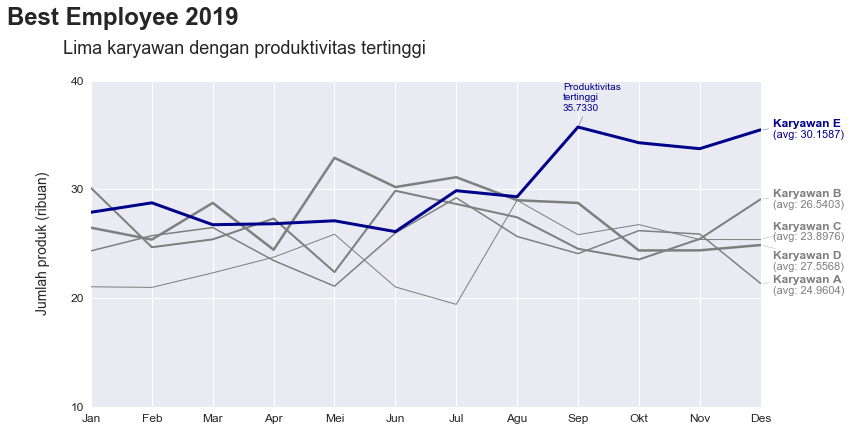

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
tabel = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/produktivitas_karyawan.csv", index_col="Bulan") / 1000
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Best Employee 2019", x=0.028, y=1.05, fontsize=24, fontweight='bold', ha="left")
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha="right")
colors = ["tab:gray", "tab:gray", "tab:gray", "tab:gray", "darkblue"]
line_widths = [ 1.5, 2, 1, 2.5, 3.]
lp = tabel.plot(kind="line", ax=ax, xlim=[0, 11], ylim=[10, 40], color=colors,
xticks=range(tabel.shape[0]), yticks=[10, 20, 30, 40])
add_lbl_pos = [ 0.3, 0.5, 1.2, -1.0, 0.5]
add_avg_pos = [-0.7, -0.5, 0.2, -2.0, -0.5]
for i, item in enumerate(lp.get_lines()):
    item.set_linewidth(line_widths[i])
    lbl = item.get_label()
    ax.annotate(lbl, (11, tabel.loc["Desember", lbl]), (11.2, tabel.loc["Desember", lbl] + add_lbl_pos[i]),
    fontweight="bold", fontsize=12, color=colors[i], va="center",
    arrowprops={"arrowstyle": "-", "color": colors[i]})
    ax.annotate("(avg: %.4f)" % tabel[lbl].mean(), (11, tabel.loc["Desember", lbl]),
    (11.2, tabel.loc["Desember", lbl] + add_avg_pos[i]),
    fontsize=11, color=colors[i], va="center")
highest_prod = tabel["Karyawan E"].max()
ax.annotate("Produktivitas\ntertinggi\n%.4f" % highest_prod, (8, highest_prod), (7.75, highest_prod+1.5),
ha="left", color=colors[-1], arrowprops={"arrowstyle": "-", "color": colors[-1]})
ax.set_xticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_yticklabels([str(i) for i in [10, 20, 30, 40]], fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Jumlah produk (ribuan)\n", fontsize=14)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.get_legend().remove()
plt.show()